### Student Information
Name:鍾定達

Student ID:105030008

GitHub ID:Henry-Chung1119

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### Part1

In [2]:
### Part2# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
#Answer here
X.loc[lambda f: f.category == 3].sample(n=10, axis=0)

text  category  \
905   From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
1951  From: abigail@ramsey.cs.laurentian.ca (Shawn A...         3   
596   From: will@futon.webo.dg.com (Will Taber) Subj...         3   
31    From:  (Phil Bowermaster) Subject: C. S. Lewis...         3   
2156  From: bohja@cnsvax.uwec.edu Subject: WITCHES A...         3   
374   From: conditt@tsd.arlut.utexas.edu (Paul Condi...         3   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
1312  From: jayne@mmalt.guild.org (Jayne Kulikauskas...         3   
2056  From: eng10205@nusunix1.nus.sg (LING SIEW WEE)...         3   
1077  From: REXLEX@fnal.fnal.gov Subject: Hell_2:  B...         3   

               category_name  
905   soc.religion.christian  
1951  soc.religion.christian  
596   soc.religion.christian  
31    soc.religion.christian  
2156  soc.religion.christian  
374   soc.religion.christian  
2229  soc.religion.christian  
1312  soc.religion.christian  
2056  soc.religion.christian  
1077  soc.religion.christian

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
# Answer here
# We could observe that np.nan, undefined of the key-value pair and None will return True 
# and 'NaN' , 'None' and '' will return False.
# 'NaN', 'None' and '' will return False because they are not null, they are strings.


In [8]:
X_sample = X.sample(n=1000) #random state

In [9]:
X_sample[0:4]

text  category  \
1923  From: rm03@ic.ac.uk (Mr R. Mellish) Subject: R...         0   
206   From: jil@donuts0.uucp (Jamie Lubin) Subject: ...         2   
1926  From: tron@fafnir.la.locus.com (Michael Trofim...         2   
1221  From: weilej@cary115.its.rpi.edu (Jason Lee We...         1   

      category_name  
1923    alt.atheism  
206         sci.med  
1926        sci.med  
1221  comp.graphics

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
# Answer here
# The order of X_sample is different from the original X 
# However, according to my observation, there's no difference between X and its previous state
X[0:20]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   

             category_name  
0            comp.graphics  
1            comp.graphics  
2   soc.religion.christian  
3   soc.religion.christian  
4   soc.religion.christian  
5   soc.religion.christian  
6   soc.religion.christian  
7                  sci.med  
8                  sci.med  
9                  sci.med  
10  soc.religion.christian  
11           comp.graphics  
12             alt.atheism  
13             alt.atheism  
14           comp.graphics  
15           comp.graphics  
16                 sci.med  
17             alt.atheism  
18  soc.religion.christian  
19             alt.atheism

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

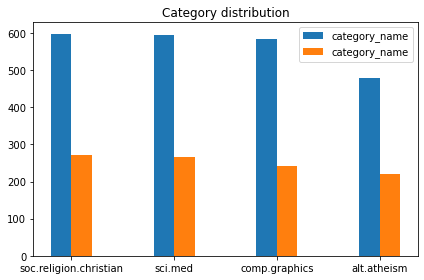

In [12]:
# Answer here
labels = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']
x = np.arange(len(labels))
width = 0.2
data1 = X.category_name.value_counts()
data2 = X_sample.category_name.value_counts()
fig, ax = plt.subplots()
figure1 = ax.bar(x - width/2, data1, width, label='category_name')
figure2 = ax.bar(x + width/2, data2, width, label='category_name')
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

In [13]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
# Answer here
array = X_counts[0:5, 0:100].toarray()[4]
# print(array)
count = 0
for i in array:
    if i == 1:
        target = count
    count = count+1
count_vect.get_feature_names()[target]

'01'

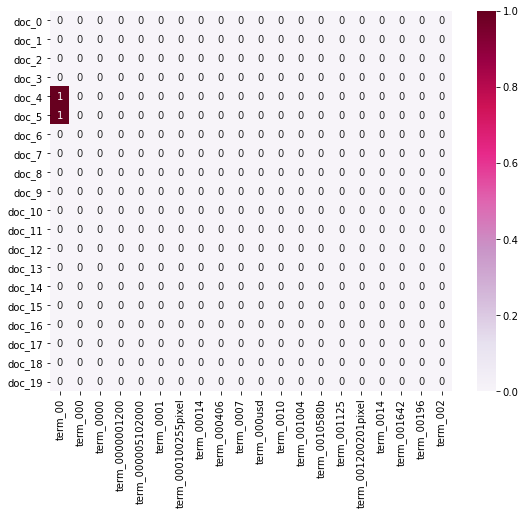

In [15]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

/Users/henry/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


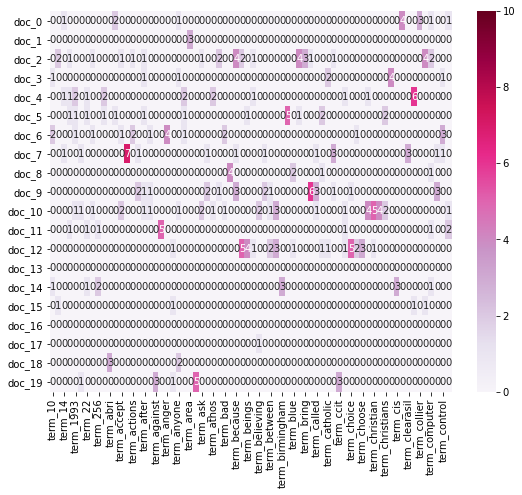

In [16]:
# Answer here
import numpy as np
plot_a = []
plot_b = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_c = []
counts = X_counts[0:20, 0:10000].toarray()


for i in range(10000):
    temp = []
    sumOfData = sum(X_counts[0:20,i])
    if sumOfData > 2 and 10 > sumOfData:
        plot_a.append("term_"+str(count_vect.get_feature_names()[i]))
        for j in range(20):
            temp.append(counts[j][i])
        plot_c.append(temp)

plot_c = np.array(plot_c)
plot_c = plot_c.transpose()
# print(plot_a)
# print(plot_b)
# print(plot_c)

data = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(9, 7))
ax_ = sns.heatmap(data,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

# If I would like to analyze doc_0 to doc_19, I would get the sum of each column and choose the sum which is both more than two and less than ten.
# By implementing this method, I could get the key words which appears at least one time among doc_0 to doc_19 and also I could get rid of the frequently but useless word like 'and'.
# And then I could get a nicer and more useful visualization.

In [19]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

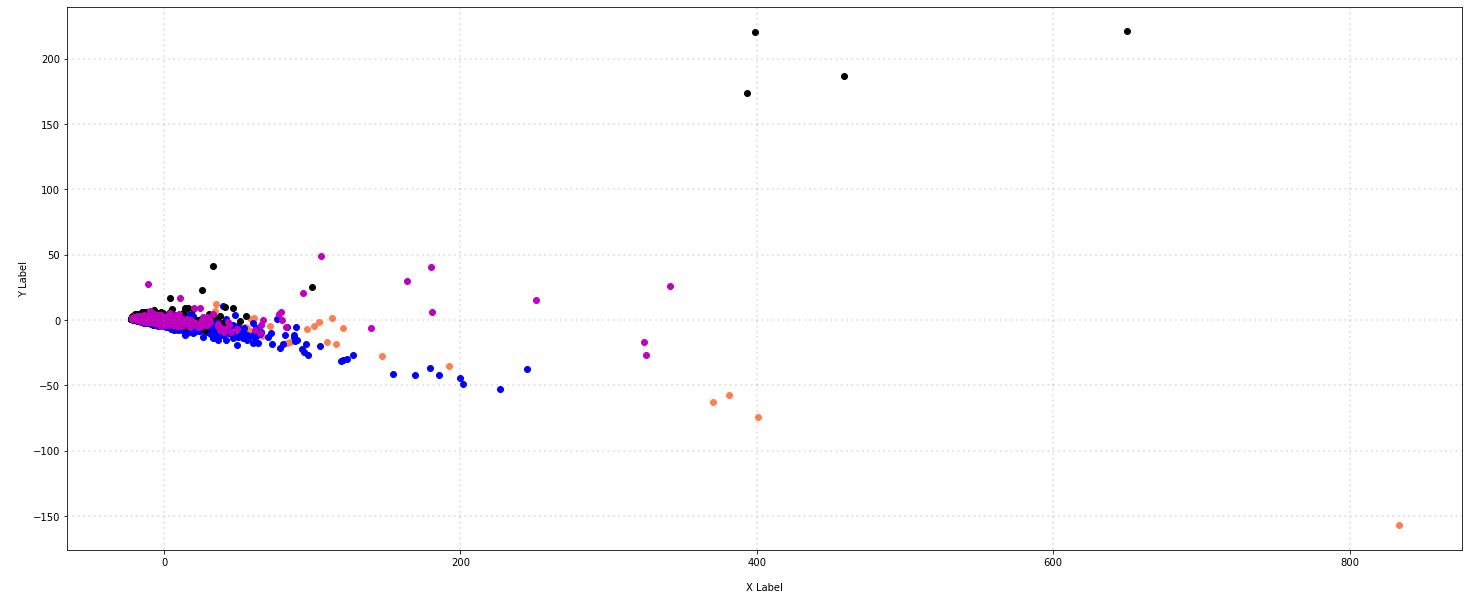

In [20]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [21]:
# Answer here
X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

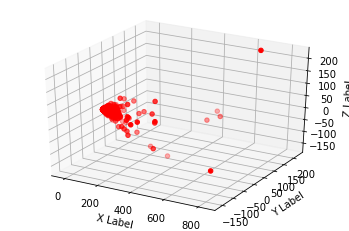

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax_ = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs_ = X_reduced_3D[X['category_name'] == category].T[0]
    ys_ = X_reduced_3D[X['category_name'] == category].T[1]
    zs_ = X_reduced_3D[X['category_name'] == category].T[2]
    ax_.scatter(xs_, ys_, zs_, c='r')
ax_.set_xlabel('X Label')
ax_.set_ylabel('Y Label')
ax_.set_zlabel('Z Label')
plt.show()

# Most of the points are aggregating in YZ plane.

In [23]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray())) # append the sum of each column
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

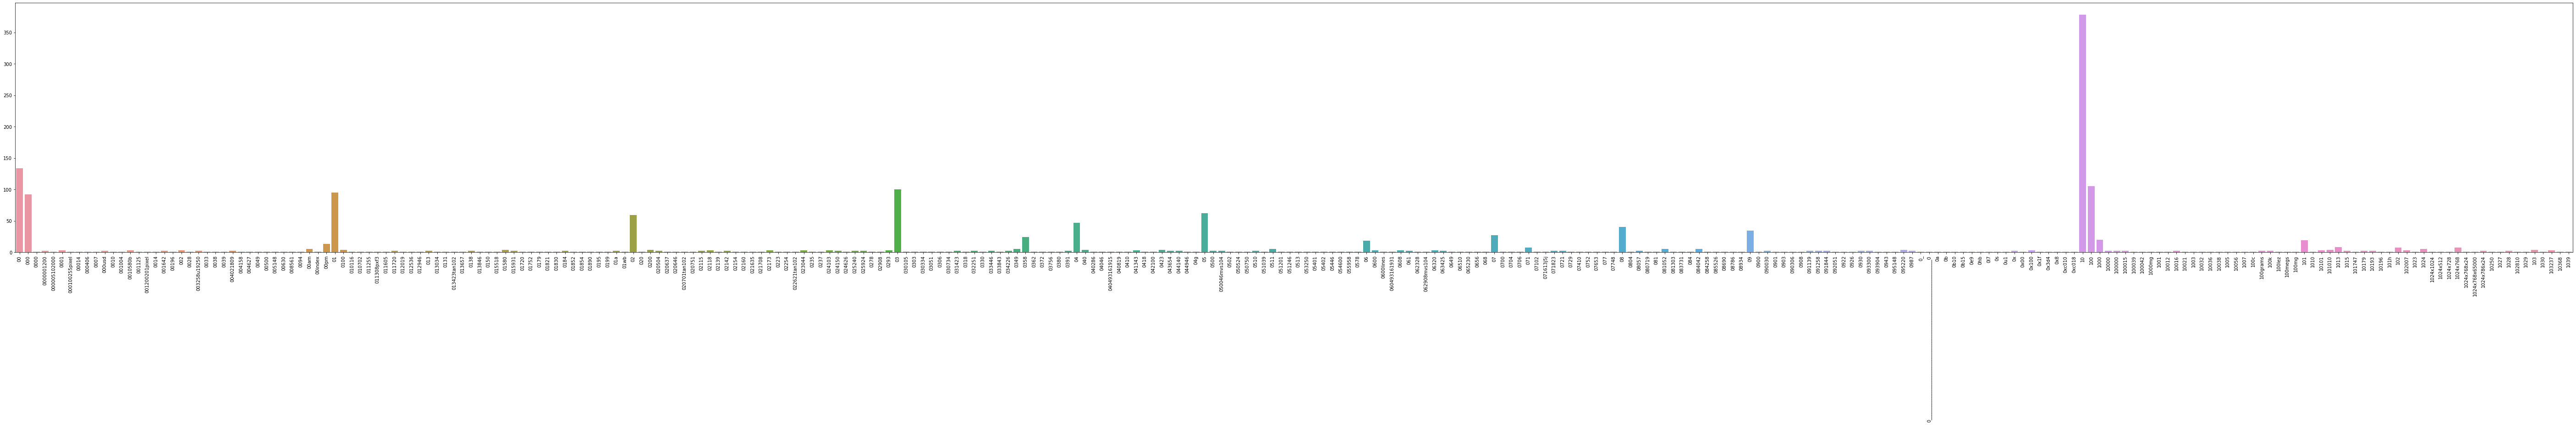

In [24]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [25]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Answer here
# import plotly.express as px
# import pandas as pd
# data_ = pd.DataFrame(count_vect.get_feature_names()[:300], columns= ['feature_names'])
# data_['term_frequencies'] = term_frequencies[:300] 
# # data_
# # df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
# fig1 = px.bar(data_, y='term_frequencies', x='feature_names', text='term_frequencies')
# fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig1.show()
import plotly.graph_objects as go
layout = go.Layout(xaxis=dict(type='category'))
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])], layout=layout)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


['00', '000', '00pm', '01', '02', '03', '0358', '04', '05', '06', '07', '071', '08', '09', '10', '100', '1000', '101', '1013', '102', '1024x768']
[134, 92, 13, 95, 59, 100, 24, 47, 62, 18, 27, 7, 40, 34, 378, 105, 20, 19, 8, 7, 7]


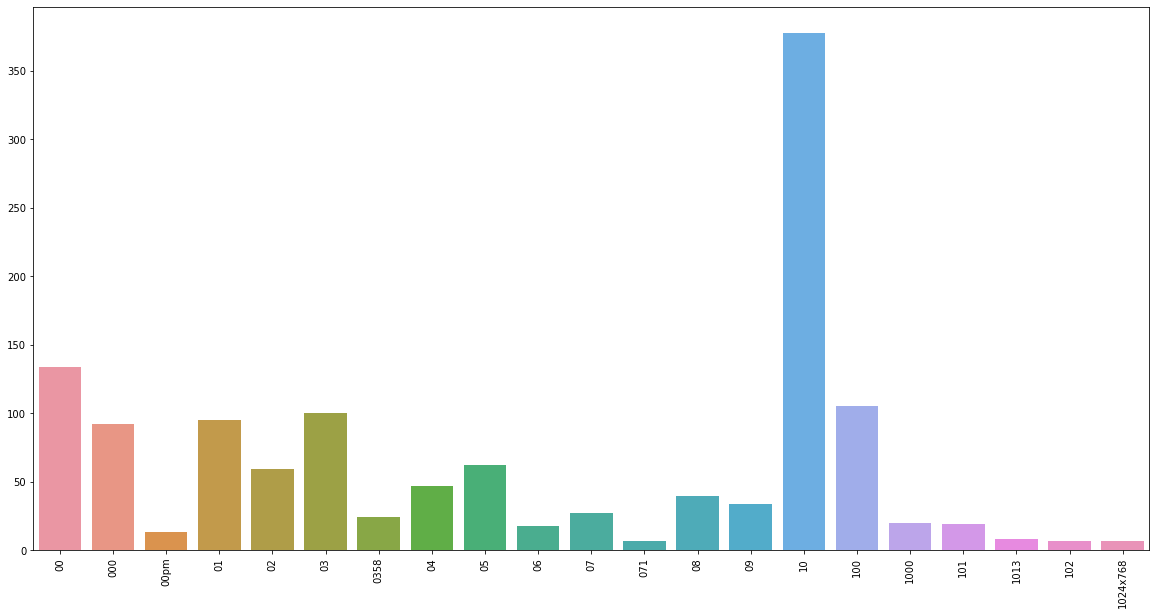

In [27]:
# Answer here
count_feature_name = []
count_term_frequencies = []
# count_vect.get_feature_names()[:300]
# print(term_frequencies)
for i in range(300):
    if term_frequencies[i] > 5:
        count_feature_name.append(count_vect.get_feature_names()[i])
        count_term_frequencies.append(term_frequencies[i])
print(count_feature_name)
print(count_term_frequencies)
# for i in count_term_frequencies
plt.subplots(figsize=(20, 10))

g1 = sns.barplot(x=count_feature_name, 
            y=count_term_frequencies)
g1.set_xticklabels(count_feature_name, rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

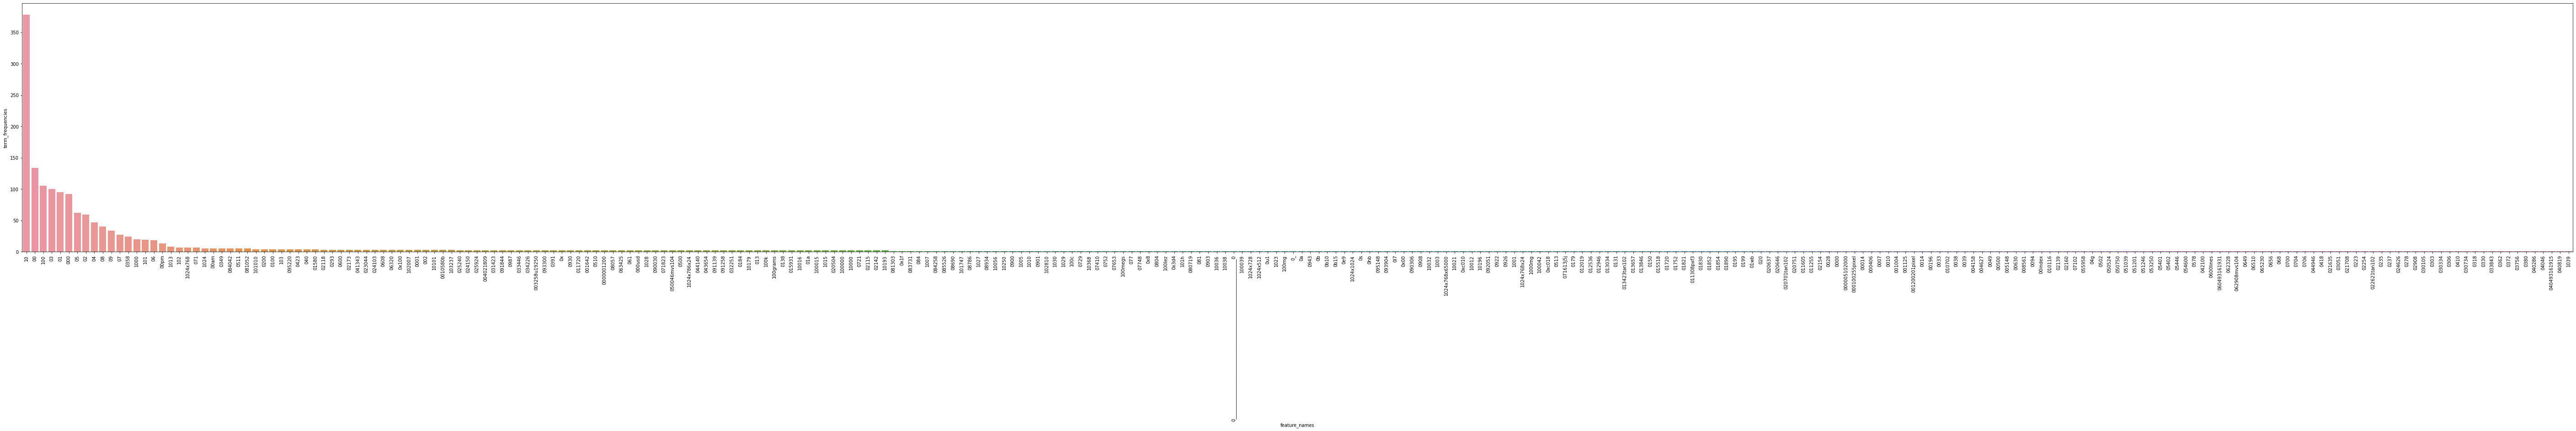

In [28]:
# Answer here
data_ = pd.DataFrame(count_vect.get_feature_names()[:300], columns= ['feature_names'])
data_['term_frequencies'] = term_frequencies[:300] 
sorted_data_ = data_.sort_values(by=['term_frequencies'], ascending=False)
plt.subplots(figsize=(100, 10))

g2 = sns.barplot(x=sorted_data_['feature_names'], 
            y=sorted_data_['term_frequencies'])
g2.set_xticklabels(sorted_data_['feature_names'], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [29]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [30]:
# Answer here
mlb_ = preprocessing.LabelBinarizer()
mlb_.fit(X.category_name)
mlb_.classes_
X['bin_category_name'] = mlb_.transform(X['category_name']).tolist()
X[0:10]

# It works too!

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
9                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

### Part2

In [32]:
# open files and make them a dataframe
sentence = []
score = []
temp_content_list = []
# read first file 'amazon_cells_labelled.txt'
with open('sentiment labelled sentences/amazon_cells_labelled.txt','r') as f:
    temp_content_list.append(f.read().splitlines())

# read second file 'imdb_labelled.txt'
with open('sentiment labelled sentences/imdb_labelled.txt','r') as f:
    temp_content_list.append(f.read().splitlines())

# # read third file 'yelp_labelled.txt'
with open('sentiment labelled sentences/yelp_labelled.txt','r') as f:
    temp_content_list.append(f.read().splitlines())
  

content_list = []
for i in range(3):
    for j in temp_content_list[i]:
        content_list.append(str(j).split('\t'))
new_dataset = pd.DataFrame(content_list, columns=['sentence','score'])
new_dataset

sentence score
0     So there is no way for me to plug it in here i...     0
1                           Good case, Excellent value.     1
2                                Great for the jawbone.     1
3     Tied to charger for conversations lasting more...     0
4                                     The mic is great.     1
...                                                 ...   ...
2997  I think food should have flavor and texture an...     0
2998                           Appetite instantly gone.     0
2999  Overall I was not impressed and would not go b...     0
3000  The whole experience was underwhelming, and I ...     0
3001  Then, as if I hadn't wasted enough of my life ...     0

[3002 rows x 2 columns]

In [33]:
new_dataset[0:3]

sentence score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1

In [34]:
# print out the text data for the first three sentences in the dataset
for t in new_dataset.sentence[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [35]:
# query the lst ten item of the dataset
new_dataset[-10:]

sentence score
2992  The refried beans that came with my meal were ...     0
2993         Spend your money and time some place else.     0
2994  A lady at the table next to us found a live gr...     0
2995            the presentation of the food was awful.     0
2996           I can't tell you how disappointed I was.     0
2997  I think food should have flavor and texture an...     0
2998                           Appetite instantly gone.     0
2999  Overall I was not impressed and would not go b...     0
3000  The whole experience was underwhelming, and I ...     0
3001  Then, as if I hadn't wasted enough of my life ...     0

In [36]:
# query every 10th record in our dataframe and our query only contains the first ten records
new_dataset.iloc[::10, 0:2][0:10]

sentence score
0   So there is no way for me to plug it in here i...     0
10                    And the sound quality is great.     1
20  I went on Motorola's website and followed all ...     0
30  This is a simple little phone to use, but the ...     0
40  It has a great camera thats 2MP, and the pics ...     1
50  Not loud enough and doesn't turn on like it sh...     0
60  Essentially you can forget Microsoft's tech su...     0
70                                  Mic Doesn't work.     0
80      I wear it everyday and it holds up very well.     1
90  For a product that costs as much as this one d...     0

In [37]:
# query every 10th record with certain attribute and our query only contains the first ten records
new_dataset.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [38]:
# standard query
new_dataset[::10][0:10]

sentence score
0   So there is no way for me to plug it in here i...     0
10                    And the sound quality is great.     1
20  I went on Motorola's website and followed all ...     0
30  This is a simple little phone to use, but the ...     0
40  It has a great camera thats 2MP, and the pics ...     1
50  Not loud enough and doesn't turn on like it sh...     0
60  Essentially you can forget Microsoft's tech su...     0
70                                  Mic Doesn't work.     0
80      I wear it everyday and it holds up very well.     1
90  For a product that costs as much as this one d...     0

In [39]:
# query random ten records with score=='0' in our dataset
new_dataset.loc[lambda f: f.score == '0'].sample(n=10, axis=0)

sentence score
849       I bought two of them and neither will charge.     0
764                  wont work right or atleast for me.     0
1182  Utterly without merit on any level, this is ak...     0
2812  The server was very negligent of our needs and...     0
1480                   Of course, the acting is blah.       0
1801  In fact, this stinker smells like a direct-to-...     0
1891  The only consistent thread holding the series ...     0
2851  Bad day or not, I have a very low tolerance fo...     0
2475                        Don't waste your time here.     0
1219  It's this pandering to the audience that sabot...     0

In [40]:
# query first five records every 10th record with score=='1'
new_dataset.loc[lambda f: f.score == '1'].iloc[::10][0:5]

sentence score
1                         Good case, Excellent value.     1
21  I bought this to use with my Kindle Fire and a...     1
44                       Excellent bluetooth headset.     1
61  I really recommend this faceplates since it lo...     1
78  I love this phone , It is very handy and has a...     1

In [41]:
# find null record inside the dataset
new_dataset.isnull()

sentence  score
0        False  False
1        False  False
2        False  False
3        False  False
4        False  False
...        ...    ...
2997     False  False
2998     False  False
2999     False  False
3000     False  False
3001     False  False

[3002 rows x 2 columns]

In [42]:
# find missing values in the dataset
new_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 2)
dtype: object

In [43]:
new_dataset.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
3000    (The amoung of missing records is: , 0)
3001    (The amoung of missing records is: , 0)
Length: 3002, dtype: object

In [44]:
len(new_dataset)

3002

In [45]:
# drop missing values
new_dataset.dropna(inplace=True)
new_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [46]:
len(new_dataset)

3000

In [47]:
# check duplicate record in the dataset 
new_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2997    False
2998    False
2999    False
3000    False
3001    False
Length: 3000, dtype: bool

In [48]:
sum(new_dataset.duplicated())

17

In [49]:
# drop duplicate data
new_dataset.drop_duplicates(keep='first', inplace=True)

In [50]:
sum(new_dataset.duplicated())

0

In [51]:
len(new_dataset)

2983

In [52]:
#####Data Preprocessing#####
new_dataset_sample = new_dataset.sample(n=1000) #random state

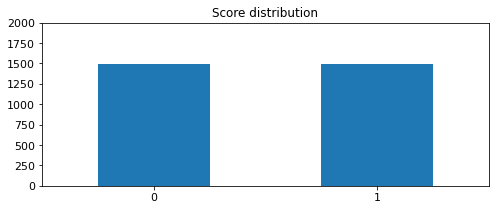

In [53]:
# plot score distribution with new_dataset
new_dataset.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

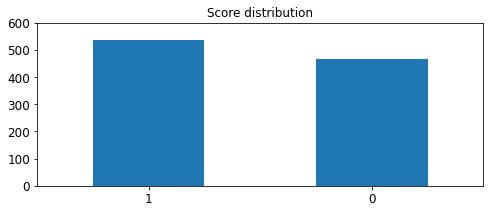

In [54]:
# plot score distribution with new_dataset_sample
new_dataset_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

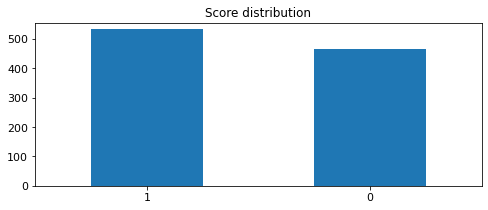

In [55]:
# plot score distribution with new_dataset_sample in automate upper-bound
upper_bound = max(new_dataset_sample.score.value_counts()) + 20
new_dataset_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

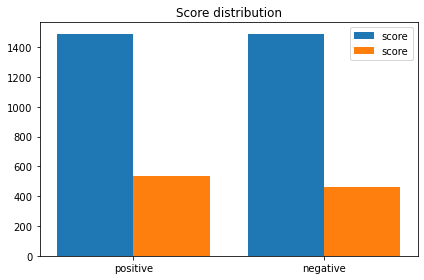

In [56]:
# compare tow datasets
new_labels = ['positive', 'negative']
x = np.arange(len(new_labels))
width = 0.4
data1 = new_dataset.score.value_counts()
data2 = new_dataset_sample.score.value_counts()
fig_new, ax_new = plt.subplots()
figure1 = ax_new.bar(x - width/2, data1, width, label='score')
figure2 = ax_new.bar(x + width/2, data2, width, label='score')
ax_new.set_title('Score distribution')
ax_new.set_xticks(x)
ax_new.set_xticklabels(new_labels)
ax_new.legend()
fig_new.tight_layout()
plt.show()

In [57]:
# obtain unigram for each sentence
import nltk
new_dataset['unigrams'] = new_dataset['sentence'].apply(lambda x: dmh.tokenize_text(x))
new_dataset[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [58]:
new_dataset[0:4]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [59]:
list(new_dataset[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [60]:
# transorfmed the articles into a term-document matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
new_dataset_counts = count_vect.fit_transform(new_dataset.sentence)

In [61]:
# analyze first record in dataset
analyze = count_vect.build_analyzer()
analyze(" ".join(list(new_dataset[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [62]:
new_dataset_counts.shape

(2983, 5155)

In [63]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [64]:
# convert new_dataset_counts to normal array
new_dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

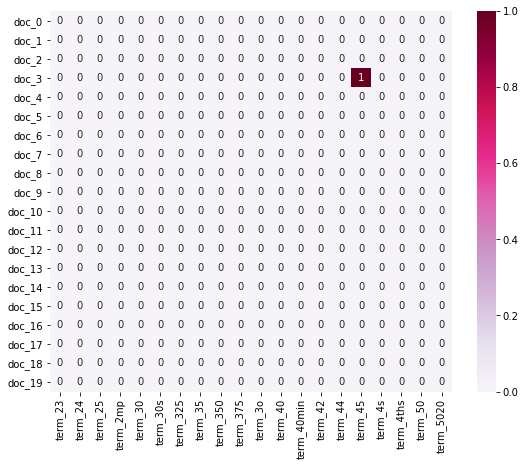

In [65]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[30:50]]
plot_y = ["doc_"+ str(i) for i in list(new_dataset.index)[0:20]]
plot_z = new_dataset_counts[0:20, 30:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

/Users/henry/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:290: SparseEfficiencyWarning:

Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.



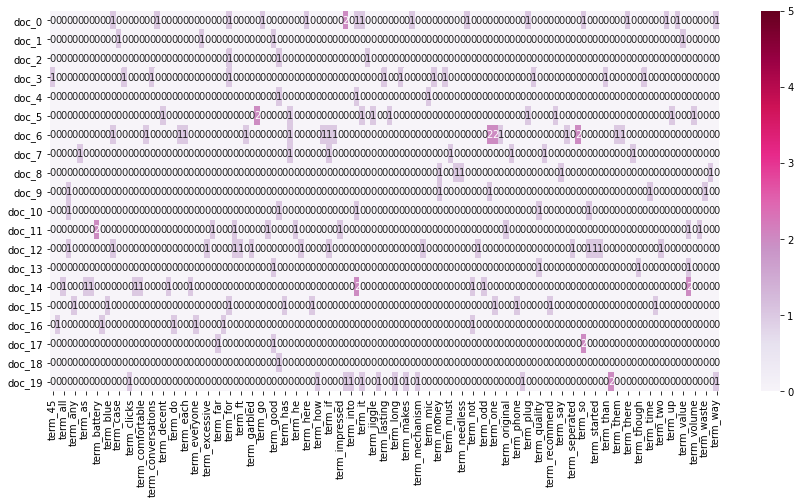

In [66]:
import numpy as np
plot_a = []
plot_b = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_c = []
counts = new_dataset_counts[0:20, 0:5000].toarray()


for i in range(5000):
    temp = []
    sumOfData = sum(new_dataset_counts[0:20,i])
    if sumOfData > 0 and 6 > sumOfData:
        plot_a.append("term_"+str(count_vect.get_feature_names()[i]))
        for j in range(20):
            temp.append(counts[j][i])
        plot_c.append(temp)

plot_c = np.array(plot_c)
plot_c = plot_c.transpose()
# print(plot_a)
# print(plot_b)
# print(plot_c)

data = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(15, 7))
ax_ = sns.heatmap(data,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

# If I would like to analyze doc_0 to doc_19, I would get the sum of each column and choose the sum which is both more than zero and less than six.
# By implementing this method, I could get the key words which appears at least one time among doc_0 to doc_19 and also I could get rid of the frequently but useless word like 'and'.
# And then I could get a nicer and more useful visualization.

In [67]:
# make use of Principal Component Analysis to efficeintly reduce the dimensions of our data
from sklearn.decomposition import PCA
new_dataset_reduced = PCA(n_components = 2).fit_transform(new_dataset_counts.toarray())
new_dataset_reduced.shape

(2983, 2)

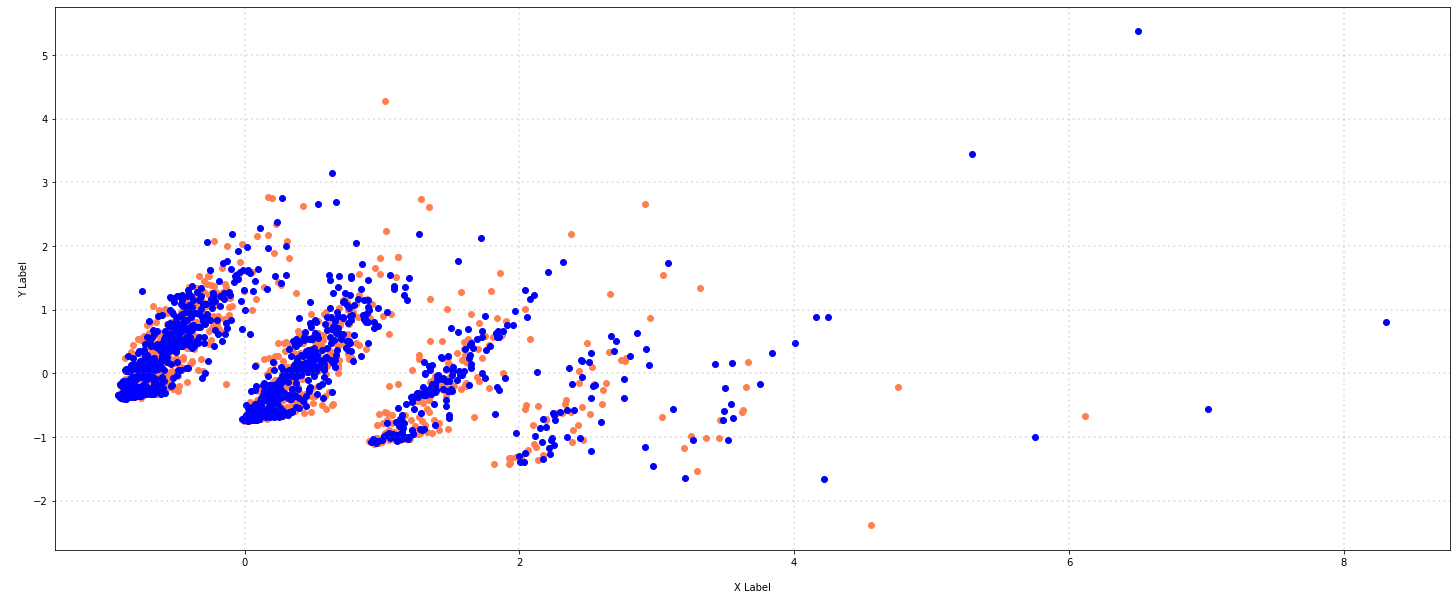

In [68]:
col = ['coral', 'blue']
scores = ['0','1']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = new_dataset_reduced[new_dataset['score'] == score].T[0]
    ys = new_dataset_reduced[new_dataset['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [69]:
# compute the time frequencies
term_frequencies = []
for j in range(0,new_dataset_counts.shape[1]):
    term_frequencies.append(sum(new_dataset_counts[:,j].toarray())) # append the sum of each column

In [70]:
term_frequencies = np.asarray(new_dataset_counts.sum(axis=0))[0]

In [71]:
term_frequencies[0]

1

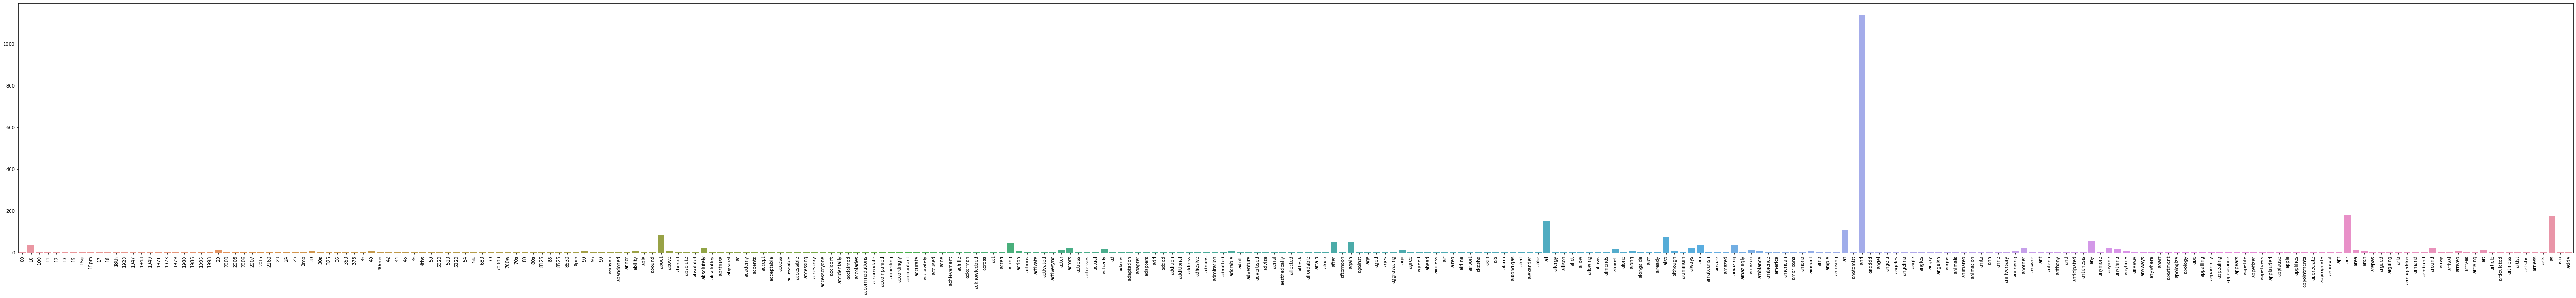

In [72]:
# plot feature_names v.s term_frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [73]:
# use plotly to plot feature_names v.s term_frequencies
import plotly.graph_objects as go
layout = go.Layout(xaxis=dict(type='category'))
fig = go.Figure([go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])], layout=layout)
fig.show()

['10', '20', '30', '90', 'about', 'above', 'absolutely', 'acting', 'action', 'actor', 'actors', 'actually', 'adorable', 'after', 'again', 'ago', 'all', 'almost', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'ambiance', 'amount', 'an', 'and', 'annoying', 'another', 'any', 'anyone', 'anything', 'are', 'area', 'around', 'arrived', 'art', 'as']
[36, 9, 7, 7, 85, 7, 21, 43, 7, 10, 19, 16, 6, 52, 49, 9, 149, 14, 74, 8, 24, 35, 34, 9, 7, 8, 106, 1138, 7, 22, 53, 23, 15, 180, 10, 21, 8, 13, 175]


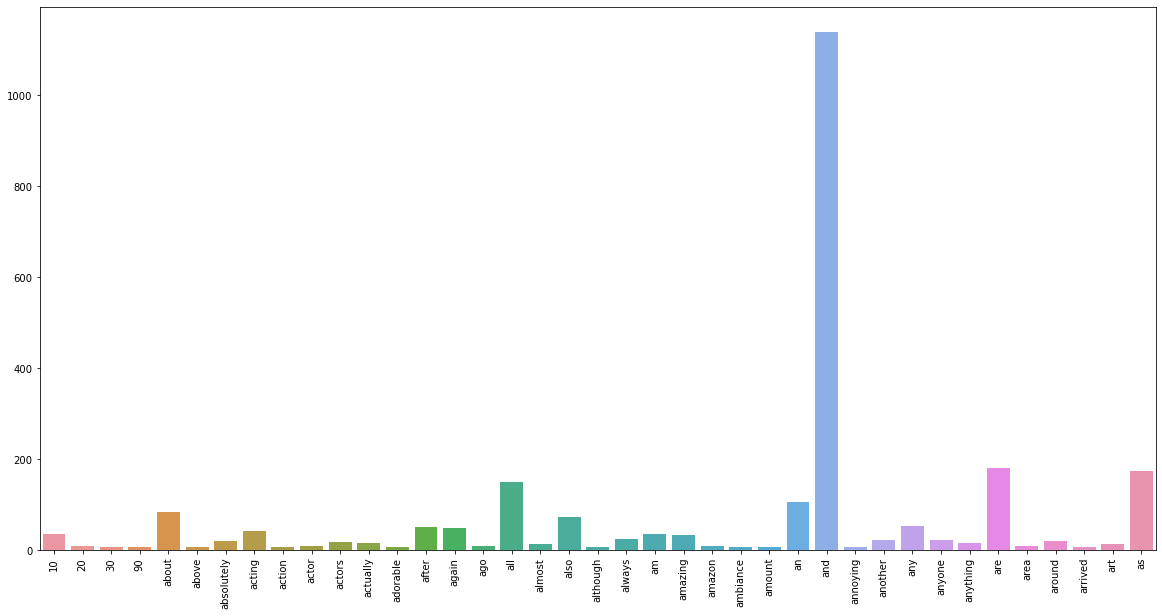

In [74]:
# reduce the number of terms
count_feature_name = []
count_term_frequencies = []
# count_vect.get_feature_names()[:300]
# print(term_frequencies)
for i in range(300):
    if term_frequencies[i] > 5:
        count_feature_name.append(count_vect.get_feature_names()[i])
        count_term_frequencies.append(term_frequencies[i])
print(count_feature_name)
print(count_term_frequencies)
# for i in count_term_frequencies
plt.subplots(figsize=(20, 10))

g1 = sns.barplot(x=count_feature_name, 
            y=count_term_frequencies)
g1.set_xticklabels(count_feature_name, rotation = 90);

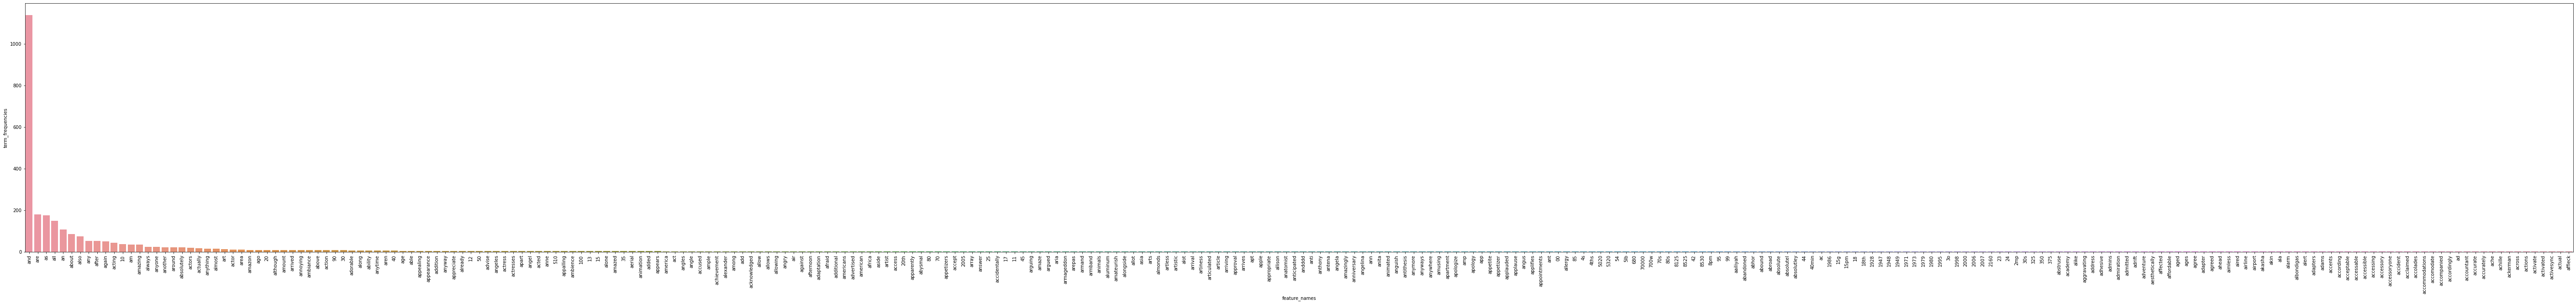

In [75]:
# change the x-axis by alphatic alphabetical order
new_data_ = pd.DataFrame(count_vect.get_feature_names()[:300], columns= ['feature_names'])
new_data_['term_frequencies'] = term_frequencies[:300] 
sorted_data_ = new_data_.sort_values(by=['term_frequencies'], ascending=False)
plt.subplots(figsize=(100, 10))

g2 = sns.barplot(x=sorted_data_['feature_names'], 
            y=sorted_data_['term_frequencies'])
g2.set_xticklabels(sorted_data_['feature_names'], rotation = 90);

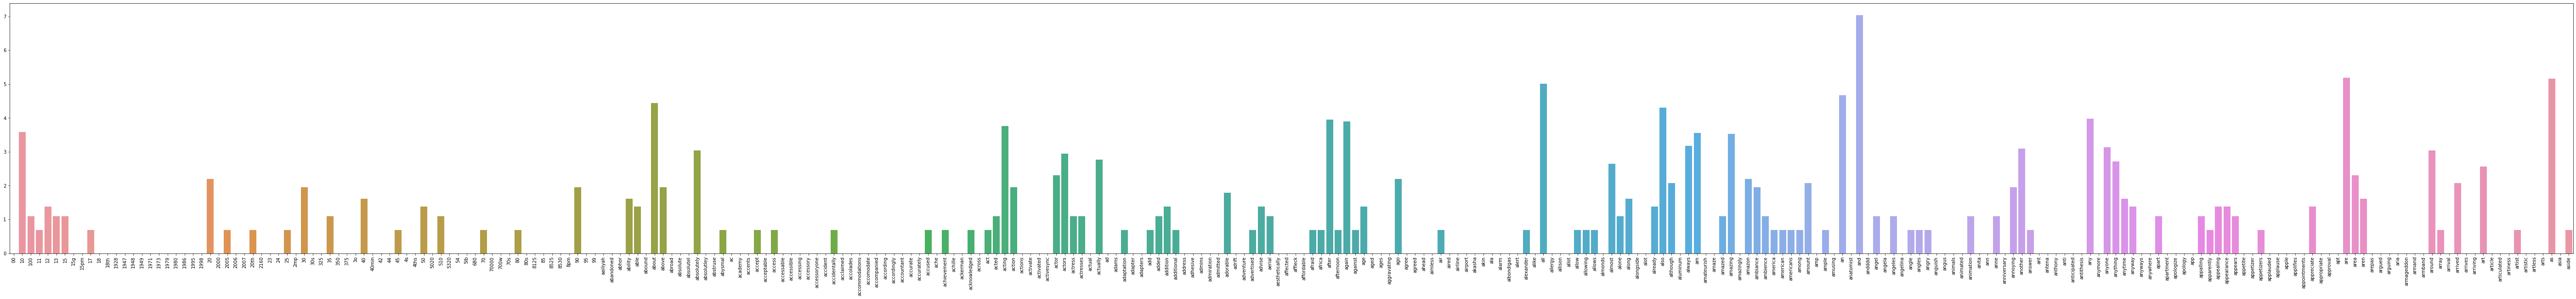

In [77]:
# plot term_frequencies in a log scale
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [82]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_dataset.score)
new_dataset['bin_sentence'] = mlb.transform(new_dataset['score']).tolist()
new_dataset[0:9]

sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams bin_sentence  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

In [87]:
##### Data Exploration #####
# pick three records from new_dataset
document_to_transform_1 = []
random_record_1 = new_dataset.iloc[10]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = new_dataset.iloc[20]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = new_dataset.iloc[30]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['And the sound quality is great.']
["I went on Motorola's website and followed all directions, but could not get it to pair again."]
['This is a simple little phone to use, but the breakage is unacceptible.']


In [88]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [89]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.102062
Cosine Similarity using count bw 1 and 3: 0.327327
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### Part3

Generate meaningful new data visualizations

In [105]:
# using wordcloud to generate new visualization
!pip3 install wordcloud

     |████████████████████████████████| 162 kB 493 kB/s eta 0:00:01


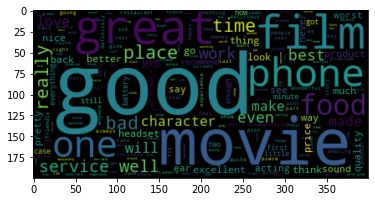

In [129]:
# using wordcloud to generate new visualization
from wordcloud import WordCloud

document = ""
for i in content_list:
    document = document+i[0]
    
cloud = WordCloud().generate(document)
plt.imshow(cloud, interpolation='bilinear')
# plt.axis("off")
# as we can see, the most frequently used words are 'good' and 'movie'

Generate TF-IDF features from the tokens of each text



In [94]:
# generate TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Tfidf_new_dataset_counts = vectorizer.fit_transform(new_dataset.sentence)

<2983x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 31510 stored elements in Compressed Sparse Row format>

In [147]:
Tfidf_dataframe = pd.DataFrame(Tfidf_new_dataset_counts.toarray(), columns = vectorizer.get_feature_names())
Tfidf_dataframe

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2978  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2979  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2980  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2981  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2982  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5155 columns]

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
new_dataset_counts = count_vect.fit_transform(new_dataset.sentence)
Word_freq_dataframe = pd.DataFrame(new_dataset_counts.toarray(), columns = count_vect.get_feature_names())
Word_freq_dataframe

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2978   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2979   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2980   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2981   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2982   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2978      0    0      0     0        0       0        0  
2979      0    0      0     0        0       0        0  
2980      0    0      0     0        0       0        0  
2981      0    0      0     0        0       0        0  
2982      0    0      0     0        0       0        0  

[2983 rows x 5155 columns]

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories

In [178]:
# implement Naive Bayes classifier for TF-IDF features
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Tfidf_dataframe, new_dataset.score, test_size=0.25)
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
mislabeled_num = 0
for i,j in zip(Y_pred, Y_test):
    if i != j:
        mislabeled_num = mislabeled_num+1
print("Total test points: " + str(X_test.shape[0]))
print("Mislabeled points: " + str(mislabeled_num))
print("Mislabeled rate: " + str(mislabeled_num/X_test.shape[0]))

Total test points: 746
Mislabeled points: 243
Mislabeled rate: 0.3257372654155496


In [186]:
# implement Naive Bayes classifier for word frequencies features
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(Word_freq_dataframe, new_dataset.score, test_size=0.25)
gnb_ = GaussianNB()
Y_pred_ = gnb.fit(X_train_, Y_train_).predict(X_test_)
mislabeled_num = 0
for i,j in zip(Y_pred_, Y_test_):
    if i != j:
        mislabeled_num = mislabeled_num+1
print("Total test points: " + str(X_test_.shape[0]))
print("Mislabeled points: " + str(mislabeled_num))
print("Mislabeled rate: " + str(mislabeled_num/X_test_.shape[0]))

Total test points: 746
Mislabeled points: 259
Mislabeled rate: 0.34718498659517427


In [185]:
# Tf-idf uses inverse document frequency to calculate the weights and to emphasize the word 
# which is frequent in a certain sentence but is less frequent in a whole sentence set. 
# Therefore, the weights of the idf in some degrees increase the correctness of the prediction. 

### Part4

Some data we just printed it out for many times and it will make it a little bit messy.

In data transformation part, we add a redundant column to the dataframe X and that column seems useless at all. Although we could use it to create the 'bin_category' classifier, we could still achieve that by using solely category_name. Also, we create a column 'unigrams' and we never utilize it.
 
Some visualization like the first heatmap which is not useful since we couldn't get any information from it and we should make some data selection before we create it. We could make a sorting or do some preprocessing to the term_frequencies to make it more useful.

